In [1]:
### Own - Conda venv --- dc_info_venv
# 
import tensorflow as tf
#from tf.keras import layers ### Fails - We have TF version == 1.5.0 

import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
#from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

%matplotlib inline
np.random.seed(1)

In [2]:
print(tf.VERSION)
print(tf.keras.__version__)
import keras
print('Keras: {}'.format(keras.__version__))

1.5.0
2.1.2-tf
Keras: 2.2.4


Using TensorFlow backend.


In [ ]:
"""
# Source --- https://github.com/larsmaaloee/nvidia-workshop-2017/blob/master/tf-tutorial.ipynb

Computational Graphs

Computational graphs can be seen as a nice way of structuring mathematical expressions wrt order of operations, 
declarative programming. Let us say that we have following expression:


This equation needs to be performed in the correct order to give the correct result. 
Therefore we define 3 operations, in this example with fixed values (a=3, b=4):

"""


In [3]:
# Source --- https://github.com/larsmaaloee/nvidia-workshop-2017/blob/master/tf-tutorial.ipynb


a = tf.constant(3.0, tf.float32)
b = tf.constant(4.0, tf.float32)
c = tf.sqrt(tf.add(tf.square(a), tf.square(b)))

print(a, b, c)

"""
Tensor("Const:0", shape=(), dtype=float32) 
Tensor("Const_1:0", shape=(), dtype=float32) 
Tensor("Sqrt:0", shape=(), dtype=float32)
"""

Tensor("Const:0", shape=(), dtype=float32) Tensor("Const_1:0", shape=(), dtype=float32) Tensor("Sqrt:0", shape=(), dtype=float32)


'\nTensor("Const:0", shape=(), dtype=float32) \nTensor("Const_1:0", shape=(), dtype=float32) \nTensor("Sqrt:0", shape=(), dtype=float32)\n'

In [6]:


av = tf.constant(3.0, tf.float32)
bv = tf.constant(4.0, tf.float32)
cv = tf.sqrt(tf.add(tf.square(av), tf.square(bv)))

print(av, bv, cv)

"""
Tensor("Const_11:0", shape=(), dtype=float32)
Tensor("Const_12:0", shape=(), dtype=float32)
Tensor("Sqrt_1:0", shape=(), dtype=float32)
"""

"""
Source -- https://jacobbuckman.com/post/tensorflow-the-confusing-parts-1/

Every time we call tf.constant, we create a new node in the graph.
This is true even if the node is functionally identical to an existing node,
even if we re-assign a node to the same variable, or even if we don’t assign it to a variable at all.
"""

Tensor("Const_2:0", shape=(), dtype=float32) Tensor("Const_3:0", shape=(), dtype=float32) Tensor("Sqrt_1:0", shape=(), dtype=float32)


'\nTensor("Const_11:0", shape=(), dtype=float32)\nTensor("Const_12:0", shape=(), dtype=float32)\nTensor("Sqrt_1:0", shape=(), dtype=float32)\n'

In [7]:
sess = tf.Session()
print(*sess.run([av, bv, cv]))

3.0 4.0 5.0


In [4]:
# earlier created Constants 
# Now creating placeHolders

a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
c = tf.sqrt(tf.add(tf.square(a), tf.square(b)))

print(a, b, c)

sess = tf.Session()
print(*sess.run([a, b, c], feed_dict={a: 4., b: 3.}))

Tensor("Placeholder:0", dtype=float32) Tensor("Placeholder_1:0", dtype=float32) Tensor("Sqrt_1:0", dtype=float32)
4.0 3.0 5.0


In [9]:
print(*sess.run([a, b, c], feed_dict={a: 4., b: 4.}))

4.0 4.0 5.656854


In [5]:
print(*sess.run([a, b, c], feed_dict={a: 4., b: 9.}))

4.0 9.0 9.848858


In [ ]:
"""

Differentiation

Backpropagation is one of the most essential building blocks in deep learning. 
An optimal way of performing backpropagation is by using the computational graph to take
the partial derivatives between variabels. This way we sum over the derivatives of the nodes in the graph.

So let's consider a linear regression problem.

"""

In [11]:
W = tf.Variable([.3], tf.float32)
b = tf.Variable([-.3], tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W * x + b

In [12]:
init = tf.global_variables_initializer()
sess.run(init)

In [8]:
## SOURCE --- https://jacobbuckman.com/post/tensorflow-the-confusing-parts-1/#fnref:1

two_node = tf.constant(2)
three_node = tf.constant(3)

sum_node = two_node + three_node
sess = tf.Session()
print(sess.run(sum_node)) # 5 
#
print("  "*90)
#
print(sess.run([two_node, sum_node]))

5
                                                                                                                                                                                    
[2, 5]


In [ ]:
"""
In general, sess.run() calls tend to be one of the biggest TensorFlow bottlenecks, 
so the fewer times you call it, the better. 
Whenever possible, return multiple items in a single sess.run() call instead of making multiple calls.
"""

In [9]:
###  A placeholder is a type of node that is designed to accept external input.
input_placeholder = tf.placeholder(tf.int32)
sess = tf.Session()
print(sess.run(input_placeholder))
"""
To provide a value to a PLACEHOLDER, we use the feed_dict attribute of sess.run().
"""

"""
InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_2' with dtype int32
	 [[Node: Placeholder_2 = Placeholder[dtype=DT_INT32, shape=<unknown>, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
"""

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_2' with dtype int32
	 [[Node: Placeholder_2 = Placeholder[dtype=DT_INT32, shape=<unknown>, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'Placeholder_2', defined at:
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/asyncio/base_events.py", line 421, in run_forever
    self._run_once()
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/asyncio/base_events.py", line 1425, in _run_once
    handle._run()
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/asyncio/events.py", line 127, in _run
    self._callback(*self._args)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 3185, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-e6e5bcfa54ce>", line 2, in <module>
    input_placeholder = tf.placeholder(tf.int32)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 1680, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 3141, in _placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 3160, in create_op
    op_def=op_def)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1625, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_2' with dtype int32
	 [[Node: Placeholder_2 = Placeholder[dtype=DT_INT32, shape=<unknown>, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [10]:
input_placeholder = tf.placeholder(tf.int32)
sess = tf.Session()
print(sess.run(input_placeholder, feed_dict={input_placeholder: 2}))
#

2


In [ ]:
"""
feed_dict...... The DICTIONARY keys should be variables corresponding to placeholder nodes from 
the graph (which, as discussed earlier, really means pointers to placeholder nodes in the graph). 
The corresponding values are the data elements to assign to each placeholder – typically scalars or Numpy arrays.

"""

In [11]:
### Computation Paths

input_placeholder = tf.placeholder(tf.int32)
three_node = tf.constant(3)
sum_node = input_placeholder + three_node
sess = tf.Session()
print(sess.run(three_node))
print(sess.run(sum_node))

"""
InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_4' with dtype int32
	 [[Node: Placeholder_4 = Placeholder[dtype=DT_INT32, shape=<unknown>, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
"""

3


InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_4' with dtype int32
	 [[Node: Placeholder_4 = Placeholder[dtype=DT_INT32, shape=<unknown>, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'Placeholder_4', defined at:
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/asyncio/base_events.py", line 421, in run_forever
    self._run_once()
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/asyncio/base_events.py", line 1425, in _run_once
    handle._run()
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/asyncio/events.py", line 127, in _run
    self._callback(*self._args)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 3185, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-88f4d021ac22>", line 2, in <module>
    input_placeholder = tf.placeholder(tf.int32)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 1680, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 3141, in _placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 3160, in create_op
    op_def=op_def)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1625, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_4' with dtype int32
	 [[Node: Placeholder_4 = Placeholder[dtype=DT_INT32, shape=<unknown>, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [ ]:
"""

The fact that Tensorflow automatically routes computation only through nodes that are necessary 
is a huge strength of the framework. It saves a lot of runtime on calls if the graph is very big
and has many nodes that are not necessary. 
It allows us to construct large, “multi-purpose” graphs, which use a single, shared set of core nodes
to do different things depending on which computation path is taken.
For almost every application, it’s important to think about sess.run() calls in terms of the computation 
path taken.

"""

In [ ]:
### Variables & Side Effects --- FATT 

"""
So far, we’ve seen two types of “no-ancestor” nodes: tf.constant, which is the same for every run, 
and tf.placeholder, which is different for every run. 

There’s a third case that we often want to consider: a node which generally has the same value 
between runs, but can also be updated to have a new value. That’s where variables come in.
"""

"""
Understanding variables is essential to doing deep learning with Tensorflow, 
because the parameters of your model fall into this category. 

During training, you want to update your parameters at every step, via gradient descent; 
but during evaluation, you want to keep your parameters fixed, and pass a bunch of different 
test-set inputs into the model.

More than likely, all of your model’s trainable parameters will
be implemented as variables.
"""



"""
To create variables, use tf.get_variable().

The first two arguments to tf.get_variable() are required; the rest are optional. 
They are tf.get_variable(name, shape). 

name is a string which uniquely identifies this variable object. 
It must be unique relative to the global graph, so be careful to keep track of all names you 
have used to ensure there are no duplicates.
"""


"""
shape is an array of integers corresponding to the shape of a tensor; 
the syntax of this is intuitive – just one integer per dimension, in order.

For example, a 3x8 matrix would have shape [3, 8]. To create a scalar, use an empty list as your shape: [].
"""


"""
"""


In [12]:
## Create a VARIABLE == count_variable

count_variable = tf.get_variable("count", [])
sess = tf.Session()
print(sess.run(count_variable))
#
# FailedPreconditionError: Attempting to use uninitialized value count
#
"""
FailedPreconditionError: Attempting to use uninitialized value count
	 [[Node: _retval_count_0_0 = _Retval[T=DT_FLOAT, index=0, _device="/job:localhost/replica:0/task:0/device:CPU:0"](count)]]
"""

FailedPreconditionError: Attempting to use uninitialized value count
	 [[Node: _retval_count_0_0 = _Retval[T=DT_FLOAT, index=0, _device="/job:localhost/replica:0/task:0/device:CPU:0"](count)]]

In [ ]:
"""
When a variable node is first created, it basically stores “null”, and any attempts to evaluate it will 
result in this exception. 

We can only evaluate a variable after putting a value into it first. 
There are two main ways to put a value into a variable: initializers and tf.assign(). 
"""

In [13]:
count_variable = tf.get_variable("count", [])
# DHANK - FATT --- from FILE --variable_scope.py---
##  ~/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/tensorflow/python/ops/variable_scope.py in _get_single_variable(self, name, shape, dtype, initializer, regularizer, partition_info, reuse, trainable, collections, caching_device, validate_shape, use_resource, constraint)
# ValueError: Variable count already exists, disallowed. 
# Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

zero_node = tf.constant(0.)
assign_node = tf.assign(count_variable, zero_node)
#sess = tf.Session() ## Dhank - Commented out - do we need to INIT Session everytime ?? NO. 
sess.run(assign_node)
print(sess.run(count_variable))
#

ValueError: Variable count already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "<ipython-input-12-185adff38bd7>", line 3, in <module>
    count_variable = tf.get_variable("count", [])
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/home/dhankar/anaconda2/envs/dc_info_venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 3185, in run_ast_nodes
    if (yield from self.run_code(code, result)):


In [6]:
#count_variable = tf.get_variable("count", [])
### if we restart the Notebook we get === NameError: name 'count_variable' is not defined
# DHANK - FATT --- if we RE-RUN the JupyterNotebook CELL --- ValueError: Variable count already exists, disallowed. 
##Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

zero_node = tf.constant(0.) ## Graph Node which is storing the CONSTANT value == ZERO. 
assign_node = tf.assign(count_variable, zero_node)
sess = tf.Session() ## Dhank - Commented out - do we need to INIT Session everytime ?? NO. 
##### if we restart the Notebook we get === NameError: name 'sess' is not defined
sess.run(assign_node)
print(sess.run(count_variable))
#

0.0


In [ ]:
### FATT --- Gone to Notebook === tensorFlow_25NOV18

In [10]:
### this cell FAILS - need to understand why ??

a = tf.constant(3.0, tf.float32)
b = tf.constant(4.0, tf.float32)
z = tf.constant(7.0, tf.float32)

c = tf.sqrt(tf.add(tf.square(a), tf.square(b),tf.square(z)))

print(a,b,z,c)



TypeError: Using a `tf.Tensor` as a Python `bool` is not allowed. Use `if t is not None:` instead of `if t:` to test if a tensor is defined, and use TensorFlow ops such as tf.cond to execute subgraphs conditioned on the value of a tensor.

In [6]:
# Importing MNIST data set
from keras.datasets import mnist

# Assigning the data from the data set
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
print(type(X_train))
print(X_train.shape)
#
print(X_test.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)
(10000, 28, 28)


In [22]:
# Print SHAPE of Labels
print(y_train.shape)
# Print First 30 labels
print(y_train[0:30])
# print 20-30 Labels
print(y_train[20:30])
# Last 1st to Last 3 Labels
print(y_train[:-3])


(60000,)
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7]
[4 0 9 1 1 2 4 3 2 7]
[5 0 4 ... 1 8 3]


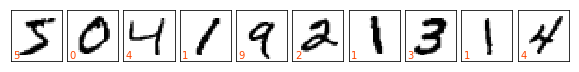

In [25]:
# Source == http://codewithmax.com/2018/03/06/basic-example-of-a-neural-network-with-tensorflow-and-keras/
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html

# Defining the figure for plotting, using 'xticks':[] and 'yticks':[]
# to avoid the ticks on axes
fig, axes = plt.subplots(1, 10, figsize=(10, 1),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

# Looping through the images and their corresponding labels
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='binary')
    ax.text(0.05, 0.05, str(y_train[i]), transform=ax.transAxes, color='orangered')

In [32]:
### Numpy BroadCasting ADDITION 

import numpy as np

a = np.array([1,1,1])
b = np.array([[0,0,0],[1,1,1],[2,2,2]])

c= a + b 

print(c)

[[1 1 1]
 [2 2 2]
 [3 3 3]]


In [29]:
### Numpy BroadCasting ADDITION 
import numpy as np

a = np.array([1,2,3,4,5,6,7])
b = np.array([1,2,3,4,5,6,7,8,9,10])
c= a + b 
## Above -- ValueError: operands could not be broadcast together with shapes (7,) (10,) 
print(c)

ValueError: operands could not be broadcast together with shapes (7,) (10,) 